In [1]:
import pandas as pd
from os import name
#予測データcsvを読込
df = pd.read_csv('C:/Users/10047413/Desktop/python/anaconda/AI_prediction/Pre_data.csv', encoding='cp932')
df

,y,20番,30番,50番,両方,ヘッド派生,機能性,デザイン性,自分が買うか,店で売れるか
0,24400,1,0,0,0,0,-0.021026,-0.944557,-0.551906,-0.982606
1,38500,1,0,0,0,0,-0.910111,0.114492,0.305444,-0.400238
2,80000,1,0,0,0,1,-0.243297,1.366095,2.487788,1.679649
3,62200,1,0,0,0,0,0.423517,-0.078063,-0.551906,-0.233847
4,24780,1,0,0,0,0,0.090110,0.499600,-0.084260,0.015740
5,48100,1,0,0,0,0,-0.243297,0.114492,0.851030,0.182131
6,37900,1,0,0,0,0,0.090110,0.403323,1.474557,0.514912
7,50000,1,0,0,0,0,-2.688282,0.692155,-0.006320,0.348521
8,40800,1,0,0,0,0,-0.354433,1.077263,1.552498,0.764499
9,58300,1,0,0,0,0,-0.576704,0.595878,0.617207,-0.233847


In [2]:
#データの型を確認（int64型にする、object型がある場合はcsvを数値にして再アップロード）
print(df.dtypes)

y           int64
20番         int64
30番         int64
50番         int64
両方          int64
ヘッド派生       int64
機能性       float64
デザイン性     float64
自分が買うか    float64
店で売れるか    float64
dtype: object


In [3]:
#欠損値の確認、全て0になっているか
df.isnull().sum()

y         0
20番       0
30番       0
50番       0
両方        0
ヘッド派生     0
機能性       0
デザイン性     0
自分が買うか    0
店で売れるか    0
dtype: int64

In [4]:
#numpyとマットプロットリブをインポート
import numpy as np
import matplotlib.pyplot as plt
#マットプロットリブで日本語表示を可能にするモジュールをインストール
!pip install japanize_matplotlib
#日本語表示を可能にするためインポート
import japanize_matplotlib
#xの設定：データベースの予測値yをドロップしたものをx（説明変数）とする
x = df.drop(['y'], axis=1)
#yの設定：予測値yを目的変数とする
y = df['y'].values

In [5]:
#テストサイズ40%でシミュレーション
test_size = 0.4

In [6]:
#訓練データ、テストデータをセット
from sklearn.model_selection import train_test_split
#random_state=123はランダム値を固定するための処理
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=test_size, random_state=123)

In [7]:
#訓練データの数を確認
print(x_train.shape)
print(y_train.shape)

(19, 9)
(19,)


In [8]:
#k近傍法をセット
from sklearn.neighbors import KNeighborsRegressor
#objective='reg:squarederror'は警告メッセージを出さないための処理
algorithm = KNeighborsRegressor()

In [9]:
#アルゴリズムで学習の開始
algorithm.fit(x_train, y_train)

KNeighborsRegressor()

In [10]:
#アルゴリズムで予測
y_pred = algorithm.predict(x_test)
print(y_pred)

[47597.  35920.  39297.  25361.  26584.  25361.  25361.  34967.  34727.
 36173.4 31884.  35920.  35404.  30380. ]


In [11]:
#r2スコアの確認
score = algorithm.score(x_test, y_test)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print(f'score: {score:.4f} r2_score: {r2_score:.4f}')

score: -0.2132 r2_score: -0.2132


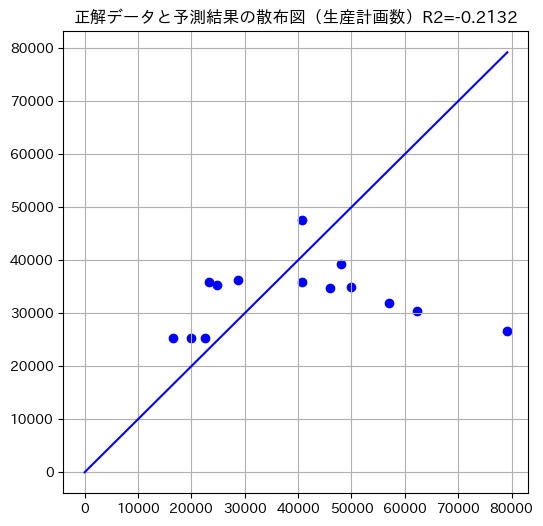

In [12]:
#正解データと予測データの散布図で状況を確認
plt.figure(figsize=(6, 6))
y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), c='blue')
plt.scatter(y_test, y_pred, c='b')
plt.title(f'正解データと予測結果の散布図（生産計画数）R2={score:.4f}')
plt.grid()
plt.show()

In [13]:
#全てのデータで予測をするため、df_2に予測データを格納
df_2 = pd.read_csv('C:/Users/10047413/Desktop/python/anaconda/AI_prediction/Pre_data.csv', encoding='cp932')
df_2

,y,20番,30番,50番,両方,ヘッド派生,機能性,デザイン性,自分が買うか,店で売れるか
0,24400,1,0,0,0,0,-0.021026,-0.944557,-0.551906,-0.982606
1,38500,1,0,0,0,0,-0.910111,0.114492,0.305444,-0.400238
2,80000,1,0,0,0,1,-0.243297,1.366095,2.487788,1.679649
3,62200,1,0,0,0,0,0.423517,-0.078063,-0.551906,-0.233847
4,24780,1,0,0,0,0,0.090110,0.499600,-0.084260,0.015740
5,48100,1,0,0,0,0,-0.243297,0.114492,0.851030,0.182131
6,37900,1,0,0,0,0,0.090110,0.403323,1.474557,0.514912
7,50000,1,0,0,0,0,-2.688282,0.692155,-0.006320,0.348521
8,40800,1,0,0,0,0,-0.354433,1.077263,1.552498,0.764499
9,58300,1,0,0,0,0,-0.576704,0.595878,0.617207,-0.233847


In [14]:
#予測値yを除去し説明変数xのみのデータフレームを作成しdf_3に格納
df_3 = df_2.drop('y', axis=1)
df_3.head()

,20番,30番,50番,両方,ヘッド派生,機能性,デザイン性,自分が買うか,店で売れるか
0,1,0,0,0,0,-0.021026,-0.944557,-0.551906,-0.982606
1,1,0,0,0,0,-0.910111,0.114492,0.305444,-0.400238
2,1,0,0,0,1,-0.243297,1.366095,2.487788,1.679649
3,1,0,0,0,0,0.423517,-0.078063,-0.551906,-0.233847
4,1,0,0,0,0,0.090110,0.499600,-0.084260,0.015740


In [15]:
#アルゴリズムで予測を実行しdf_predに予測結果を格納
df_pred = algorithm.predict(df_3)
df_pred

array([35502.6, 35404. , 54120. , 30380. , 35404. , 39297. , 39297. ,
       34967. , 47597. , 39297. , 39297. , 31884. , 36173.4, 25361. ,
       25899. , 29527. , 35920. , 36173.4, 36173.4, 36173.4, 30762.6,
       26584. , 50713.4, 34727. , 35920. , 31338. , 35920. , 30664. ,
       23878. , 25361. , 25361. , 31489.6, 37170.4])

In [16]:
#df_predをデータフレームのdf_pred_1に格納
df_pred_1 = pd.DataFrame(df_pred)
df_pred_1.head()

,0
0,35502.6
1,35404.0
2,54120.0
3,30380.0
4,35404.0


In [17]:
#予測結果と説明変数のデータフレームを連結しdf_pred_2に格納
df_pred_2 = pd.concat([df_pred_1,df_3], axis=1)
df_pred_2.head()

,0,20番,30番,50番,両方,ヘッド派生,機能性,デザイン性,自分が買うか,店で売れるか
0,35502.6,1,0,0,0,0,-0.021026,-0.944557,-0.551906,-0.982606
1,35404.0,1,0,0,0,0,-0.910111,0.114492,0.305444,-0.400238
2,54120.0,1,0,0,0,1,-0.243297,1.366095,2.487788,1.679649
3,30380.0,1,0,0,0,0,0.423517,-0.078063,-0.551906,-0.233847
4,35404.0,1,0,0,0,0,0.090110,0.499600,-0.084260,0.015740


In [18]:
#予測値をカラム名’生産計画数’に変更しdf_pred_finalに格納
df_pred_final = df_pred_2.rename(columns={0:'item_AI_pre'})
df_pred_final.head()

,item_AI_pre,20番,30番,50番,両方,ヘッド派生,機能性,デザイン性,自分が買うか,店で売れるか
0,35502.6,1,0,0,0,0,-0.021026,-0.944557,-0.551906,-0.982606
1,35404.0,1,0,0,0,0,-0.910111,0.114492,0.305444,-0.400238
2,54120.0,1,0,0,0,1,-0.243297,1.366095,2.487788,1.679649
3,30380.0,1,0,0,0,0,0.423517,-0.078063,-0.551906,-0.233847
4,35404.0,1,0,0,0,0,0.090110,0.499600,-0.084260,0.015740


In [19]:
import os

directory = r'C:/Users/10047413/Desktop/python/anaconda/AI_prediction/Pre_res'
filename = 'KNN_AI_pre.csv'
filepath = os.path.join(directory, filename)

df_pred_final.to_csv(filepath, encoding='cp932')